# Notebook: Preprocessing Sentinel-2 Imagery
This notebook demonstrates how to use functions from `preprocessing.py` to:
- Load and visualize bands
- Calculate NDVI
- Clip images using a shapefile (AOI)
- Normalize bands
- Resample imagery

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from preprocessing import (
    load_band,
    normalize,
    calculate_ndvi,
    clip_raster_with_shapefile,
    resample_band
)
import matplotlib.pyplot as plt

In [5]:
# File paths
red_path = "../data/Sentinel2A_subset_bands_ToA_BGRNirSWIR1SWIR2.tif"
nir_path = "../data/Sentinel2A_subset_bands_ToA_BGRNirSWIR1SWIR2.tif"
aoi_path = "../data/aoi.json"

In [6]:
# Load Red and NIR bands
red, _ = load_band(red_path)
nir, _ = load_band(nir_path)

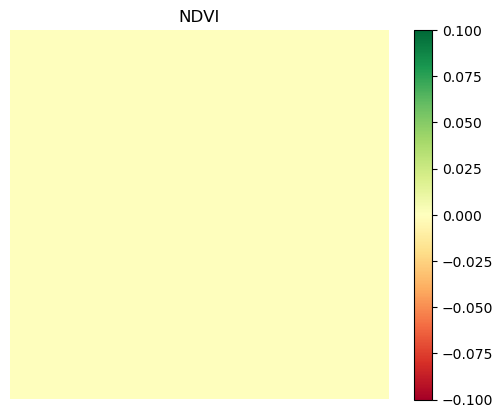

In [7]:
# Calculate NDVI
ndvi = calculate_ndvi(nir, red)

plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.title("NDVI")
plt.axis("off")
plt.show()

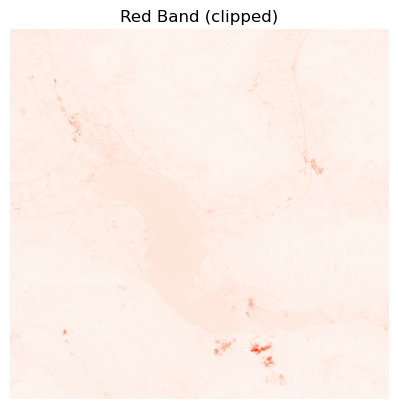

In [8]:
# Clip Red band using AOI shapefile
clipped_red, red_meta = clip_raster_with_shapefile(red_path, aoi_path)

plt.imshow(clipped_red, cmap="Reds")
plt.title("Red Band (clipped)")
plt.axis("off")
plt.show()

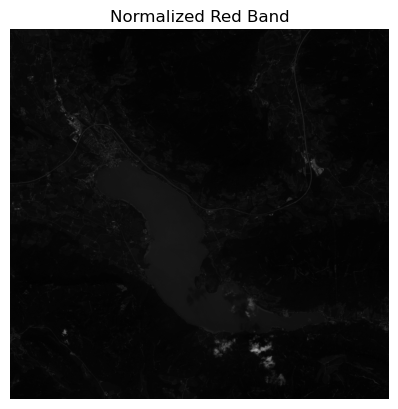

In [9]:
# Normalize the clipped band
normalized_red = normalize(clipped_red)

plt.imshow(normalized_red, cmap="gray")
plt.title("Normalized Red Band")
plt.axis("off")
plt.show()

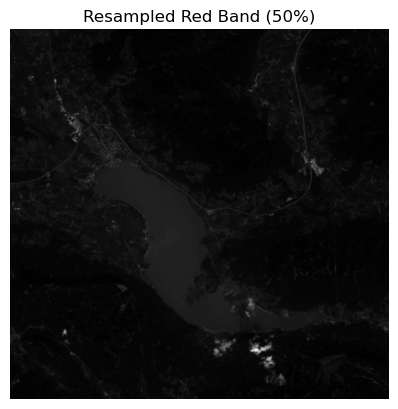

In [10]:
# Resample Red band by 50%
resampled_red, resampled_meta = resample_band(red_path, scale_factor=0.5)

plt.imshow(resampled_red, cmap='gray')
plt.title("Resampled Red Band (50%)")
plt.axis("off")
plt.show()